### Проект по статистике. Линейная регрессия
Нужно предсказать стоимость машин и понять, от каких факторов зависит ценообразование на автомобили. Помимо этого узнаем, какие переменные важны для прогнозирования и насколько хорошо полученная модель описывает данные.

### Импортируем библиотеки

In [94]:
import pandas as pd
import numpy as np
import scipy.stats as stats

import statsmodels.api as sm
import statsmodels.formula.api as smf

import seaborn as sns
import matplotlib.pyplot as plt

### Загрузим данные, проверим типы, пропущенные значения. 

In [48]:
df = pd.read_csv('cars.csv')

In [49]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [149]:
df.shape

(205, 25)

In [150]:
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [151]:
df.describe(include=['object', 'bool'])

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,company
count,205,205,205,205,205,205,205,205,205,205
unique,2,2,2,5,3,2,7,7,8,22
top,gas,std,four,sedan,fwd,front,ohc,four,mpfi,toyota
freq,185,168,115,96,120,202,148,159,94,32


In [50]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [51]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

Пропущенных значений в датасете нет

Сгенерируем первый признак.

Использовать полное название машины – не самый хороший вариант, поэтому создадим новый признак – марку автомобиля (company). Для этого используем столбец CarName, разобьём значения ячеек по пробелу и запишим в колонку первый элемент. 

In [52]:
df['car'] = df.CarName.apply(lambda x: x.split(' ')[0])

In [53]:
df['car'].head()

0    alfa-romero
1    alfa-romero
2    alfa-romero
3           audi
4           audi
Name: car, dtype: object

In [54]:
df['car'].nunique()

28

В датасете встречается 28 уникальных марок машины. Столбец CarName с полным названием машины удалим из датасета, а также car_ID, они не пригодятся для дальнейшего анализа.

In [55]:
df.drop(columns=['car_ID', 'CarName'], inplace=True)

In [56]:
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [57]:
df.rename(columns={'car': 'company'}, inplace=True)

Посмотрим на уникальные значения company. Часть из них оказалась с ошибками.

In [58]:
df.company.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [60]:
df.company = df.company.str.lower()

In [64]:
def fix_company(to_rep, how_rep):
    df.company.replace(to_rep, how_rep, inplace=True)

In [65]:
df.company = df.company.str.lower()

In [66]:
fix_company('maxda', 'mazda')
fix_company('porcshce', 'porsche')
fix_company('toyouta', 'toyota')
fix_company(['vw', 'vokswagen'], 'volkswagen')

In [67]:
df.company.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [68]:
df.company.nunique()

22

В итоге осталось 22 уникальных производителя. Посмотрим на количество автомобилей каждой марки

In [157]:
df.groupby('company', as_index=False).agg({'price':'count'})\
    .rename(columns={'price': 'quantity'}).sort_values('quantity', ascending=False)

,company,quantity
19,toyota,32
12,nissan,18
9,mazda,17
11,mitsubishi,13
6,honda,13
20,volkswagen,12
18,subaru,12
13,peugeot,11
21,volvo,11
5,dodge,9


In [22]:
df.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'company'],
      dtype='object')

Чтобы не перегружать модель большим количеством предикторов, оставим только часть из них:

'company', 'fueltype', 'aspiration','carbody', 'drivewheel', 'wheelbase', 'carlength','carwidth', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower'
также не забыв про то, что мы предсказываем – 'price'. 

После этого посчитаем корреляцию между price и другими переменными.

In [75]:
df2 = df[['company', 'fueltype', 'aspiration','carbody', 'drivewheel', 
          'wheelbase', 'carlength','carwidth', 'curbweight', 'enginetype', 
          'cylindernumber', 'enginesize', 'boreratio','horsepower', 'price']]

In [134]:
df2.head()

,company,fueltype,aspiration,carbody,drivewheel,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,price
0,alfa-romero,gas,std,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130,3.47,111,13495.0
1,alfa-romero,gas,std,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130,3.47,111,16500.0
2,alfa-romero,gas,std,hatchback,rwd,94.5,171.2,65.5,2823,ohcv,six,152,2.68,154,16500.0
3,audi,gas,std,sedan,fwd,99.8,176.6,66.2,2337,ohc,four,109,3.19,102,13950.0
4,audi,gas,std,sedan,4wd,99.4,176.6,66.4,2824,ohc,five,136,3.19,115,17450.0


Посмотрим как распределены данные, нет ли выбросов

''

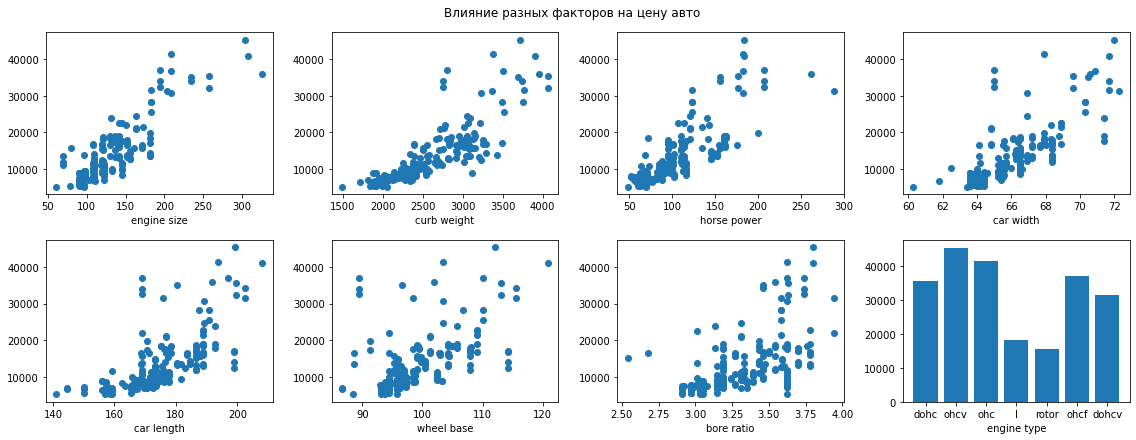

In [160]:
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(2, 4, figsize=(16, 6))
fig.suptitle('Влияние разных факторов на цену авто')
ax1.scatter(x=df2['enginesize'], y=df2['price']) 
ax1.set_xlabel('engine size')
ax2.scatter(x=df2['curbweight'], y=df2['price'])
ax2.set_xlabel('curb weight')
ax3.scatter(x=df2['horsepower'], y=df2['price'])
ax3.set_xlabel('horse power')
ax4.scatter(x=df2['carwidth'], y=df2['price'])
fig.tight_layout()
ax4.set_xlabel('car width')
ax5.scatter(x=df2['carlength'], y=df2['price'])
ax5.set_xlabel('car length')
ax6.scatter(x=df2['wheelbase'], y=df2['price'])
ax6.set_xlabel('wheel base')
ax7.scatter(x=df2['boreratio'], y=df2['price'])
ax7.set_xlabel('bore ratio')
ax8.bar(df2['enginetype'], df2['price'])
ax8.set_xlabel('engine type')
;

### Посчитаем коэффициенты корреляции Пирсона 

In [76]:
df2.corr()['price'].sort_values(ascending=False).round(2)

price         1.00
enginesize    0.87
curbweight    0.84
horsepower    0.81
carwidth      0.76
carlength     0.68
wheelbase     0.58
boreratio     0.55
Name: price, dtype: float64

Видим зависимость цены авто от различных факторов, больше всего на цену влияет объём двигателя

In [25]:
df2.dtypes

company            object
fueltype           object
aspiration         object
carbody            object
drivewheel         object
wheelbase         float64
carlength         float64
carwidth          float64
curbweight          int64
enginetype         object
cylindernumber     object
enginesize          int64
boreratio         float64
horsepower          int64
price             float64
dtype: object

Линейная регрессия в python не справляется с категориальными переменными (типом object в pandas), поэтому применим pd.get_dummies()

In [27]:
df_dummy = pd.get_dummies(data=df2[['company', 'fueltype', 'aspiration', 'carbody', 'drivewheel',  'enginetype',
       'cylindernumber']], drop_first = True)

In [28]:
df3 = df2[['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'boreratio', 'horsepower', 'price']]

In [29]:
cars = pd.concat([df3, df_dummy], axis=1)

In [30]:
cars.shape

(205, 49)

In [77]:
cars.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,company_audi,company_bmw,...,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,88.6,168.8,64.1,2548,130,3.47,111,13495.0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,88.6,168.8,64.1,2548,130,3.47,111,16500.0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,94.5,171.2,65.5,2823,152,2.68,154,16500.0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,99.8,176.6,66.2,2337,109,3.19,102,13950.0,1,0,...,1,0,0,0,0,1,0,0,0,0
4,99.4,176.6,66.4,2824,136,3.19,115,17450.0,1,0,...,1,0,0,0,1,0,0,0,0,0


In [31]:
cars.columns

Index(['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize',
       'boreratio', 'horsepower', 'price', 'company_audi', 'company_bmw',
       'company_buick', 'company_chevrolet', 'company_dodge', 'company_honda',
       'company_isuzu', 'company_jaguar', 'company_mazda', 'company_mercury',
       'company_mitsubishi', 'company_nissan', 'company_peugeot',
       'company_plymouth', 'company_porsche', 'company_renault',
       'company_saab', 'company_subaru', 'company_toyota',
       'company_volkswagen', 'company_volvo', 'fueltype_gas',
       'aspiration_turbo', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_six', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two'],
      dtype='object'

### Для оценки качества модели была выбрана метрика  R2
Сначала построим небольшую модель всего с одним предиктором цены (price) – horsepower. 

In [32]:
results = smf.ols('price ~ horsepower', data=cars).fit()

In [33]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     382.2
Date:                Fri, 01 Oct 2021   Prob (F-statistic):           1.48e-48
Time:                        19:59:38   Log-Likelihood:                -2024.0
No. Observations:                 205   AIC:                             4052.
Df Residuals:                     203   BIC:                             4059.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3721.7615    929.849     -4.003      0.0

Полученная модель объясняет 65 процент изменчивости

Теперь – две модели:

- модель со всеми предикторами
- модель со всеми предикторами, кроме марок машин

In [36]:
x = cars.drop(['price'], axis = 'columns')

In [78]:
x = sm.add_constant(x) #добавим константу, чтобы был свободный член

In [38]:
y = cars['price']

In [79]:
model = sm.OLS(y, x) #говорим модели, что у нас ЗП, а что НП

In [40]:
results = model.fit() # строим регрессионную прямую

In [41]:
print(results.summary()) # смотрим результат

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     81.09
Date:                Fri, 01 Oct 2021   Prob (F-statistic):           4.86e-89
Time:                        19:59:38   Log-Likelihood:                -1804.2
No. Observations:                 205   AIC:                             3702.
Df Residuals:                     158   BIC:                             3858.
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -3.472e+

Модель со всеми предикторами, кроме марок машин

In [80]:
cols_to_keep = cars.columns[~cars.columns.str.startswith('company_')]

In [84]:
cols_to_keep

Index(['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize',
       'boreratio', 'horsepower', 'price', 'fueltype_gas', 'aspiration_turbo',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two'],
      dtype='object')

In [85]:
x2 = cars[cols_to_keep].drop('price', axis='columns')

In [86]:
x2 = sm.add_constant(x2)

In [87]:
model = sm.OLS(y, x2)

In [88]:
results = model.fit()

In [89]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     72.32
Date:                Fri, 01 Oct 2021   Prob (F-statistic):           9.86e-81
Time:                        22:41:41   Log-Likelihood:                -1881.6
No. Observations:                 205   AIC:                             3817.
Df Residuals:                     178   BIC:                             3907.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -1.7e+

In [208]:
cars_corr_param = results.params[results.pvalues.values < 0.05].round(2).to_frame().reset_index()

In [210]:
cars_corr_param.columns = ['param', 'coeff']

### Оставим только те параметры, которые статистически значимо влияют на цену

In [211]:
cars_corr_param

,param,coeff
0,carwidth,541.87
1,horsepower,86.82
2,fueltype_gas,-2423.09
3,carbody_hardtop,-3728.09
4,carbody_hatchback,-4639.13
5,carbody_sedan,-3337.79
6,carbody_wagon,-4315.47
7,enginetype_dohcv,-17130.53
8,enginetype_ohc,4006.57
9,enginetype_ohcf,5421.28


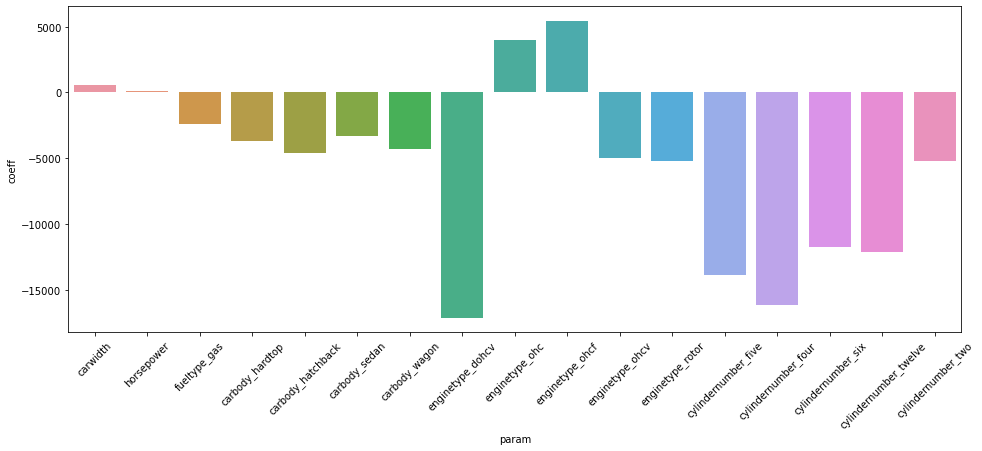

In [223]:
plt.figure(figsize=(16, 6))
sns.barplot(x = cars_corr_param['param'], y = cars_corr_param['coeff'])
plt.xticks(rotation= 45);

### Вывод
В работе было проанализировано, как характеристики машин влияют на их стоимость. Разобраны модели с разным количеством предикторов и оставлена модель с оптимальным их количеством. 

Выбранная модель объясняет примерно 90% дисперсии. Среди предикторов 10 из 27 оказались не значимыми (p > 0.05). Пример интерпретации: при единичном изменении показателя horsepower, цена возрастает на 86.8164.